In [309]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import json

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

Импортируем файл с рабочего стола проверяем типы данных кол-во пропущенных записей и размер таблицы. 

In [310]:

df = pd.read_json(open('/Users/iblackjesus/Desktop/train.json','r'))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [311]:
df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


Проверяем уровень интереса к целеовй переменной interest_level

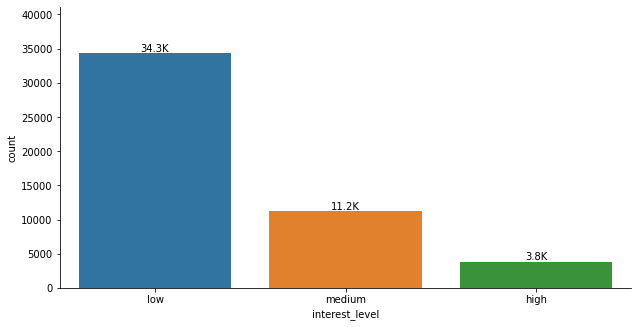

In [312]:
category= ['low','medium','high']
g=sns.catplot(x='interest_level',data=df, kind='count',order=category)
g.fig.set_size_inches(10, 5)
g.fig.subplots_adjust(top=0.9)
for ax in g.axes.ravel():
    for c in ax.containers:
        labels = [f'{(v.get_height() / 1000):.1f}K' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)
plt.show()

Из графика видно, что чаще всего встречается переменная low

In [313]:
#df['interest_level'] = df['interest_level'].map({'low': 0,'medium': 1,'high': 3 }).astype(int)

Начинаем изучать признаки и прводить их к чистоловму виду 


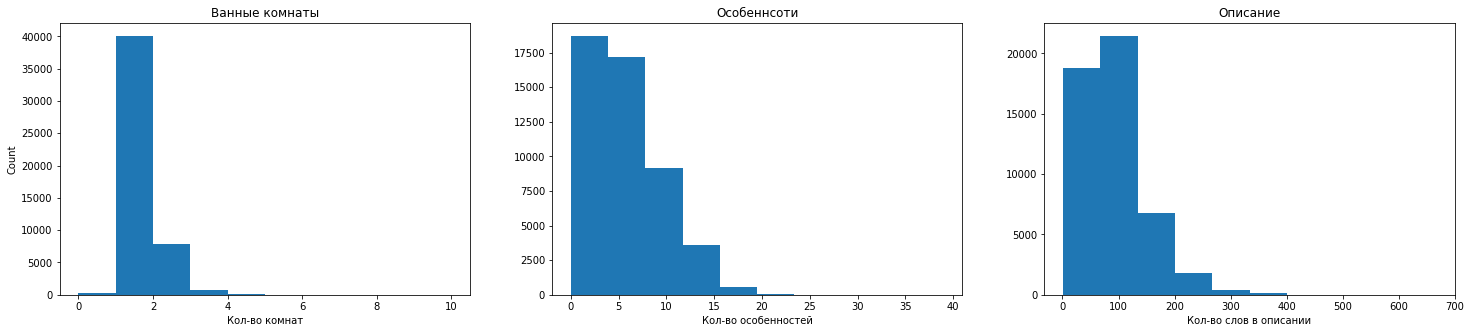

In [314]:
df['bathrooms'] = df['bathrooms'].astype(int)
df["num_features_word"] = df["features"].apply(len)
df["num_description_words"] = df["description"].apply(lambda x: len(x.split(" ")))

fig, axs = plt.subplots(1,3, figsize=(25, 5), sharey=False)
axs[0].hist(x=df['bathrooms'])
axs[0].set_ylabel('Count')
axs[0].set_xlabel('Кол-во комнат')
axs[0].set_title('Ванные комнаты')

axs[1].hist(x=df['num_features_word'])
axs[1].set_xlabel('Кол-во особенностей')
axs[1].set_title('Особеннсоти')

axs[2].hist(x=df['num_description_words'])
axs[2].set_xlabel('Кол-во слов в описании')
axs[2].set_title('Описание')
plt.show()

Преобразуем столбец с датой создания в 2 столбца с данными: год создания,месяц создания 

In [315]:
df['created'] = pd.to_datetime(df['created'], format='%Y-%m')
df['created_year'] = df['created'].dt.year
df['created_month'] = df['created'].dt.month

In [316]:
df.building_id.describe()

count     49352
unique     7585
top           0
freq       8286
Name: building_id, dtype: object

In [317]:
df.manager_id.describe()

count                                49352
unique                                3481
top       e6472c7237327dd3903b3d6f6a94515a
freq                                  2533
Name: manager_id, dtype: object

In [318]:
df.street_address.describe()
df.street_address.value_counts()

3333 Broadway                  174
505 West 37th Street           167
200 Water Street               160
90 Washington Street           142
100 Maiden Lane                131
                              ... 
577 East 184 Street              1
11 1/2 West 26th Street          1
\t100 Jane Street, Apt. 7-D      1
524 East 11th Street             1
110 W 74 St.                     1
Name: street_address, Length: 15358, dtype: int64

In [319]:
num_featuers = ['bathrooms', 'bedrooms', 'latitude', 'longitude', 'price', 'num_features_word', 'num_description_words','created_year','created_month']
target = ['interest_level']
X = df[num_featuers]
Y = df[target]
X.head()

,bathrooms,bedrooms,latitude,longitude,price,num_features_word,num_description_words,created_year,created_month
4,1,1,40.7108,-73.9539,2400,7,77,2016,6
6,1,2,40.7513,-73.9722,3800,6,131,2016,6
9,1,2,40.7575,-73.9625,3495,6,119,2016,6
10,1,3,40.7145,-73.9425,3000,0,95,2016,6
15,1,0,40.7439,-73.9743,2795,4,41,2016,6


Получаем показатель точности для train df для метода Random Forest

In [320]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.33)

clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train, Y_train)
Y_val_pred = clf.predict_proba(X_val)
log_loss(Y_val, Y_val_pred)

/var/folders/fw/wcny00cj4671kf0vmzkgjxy80000gn/T/ipykernel_19743/1696492322.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, Y_train)


0.658037409392091

Импортируем test df

In [321]:
df_train = pd.read_json(open('/Users/iblackjesus/Desktop/test.json','r'))
df_train.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,Large with awesome terrace--accessible via bed...,Suffolk Street,"[Elevator, Laundry in Building, Laundry in Uni...",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,[https://photos.renthop.com/2/7142618_1c45a2c8...,2950,99 Suffolk Street
1,1.0,2,0,2016-06-24 06:36:34,Prime Soho - between Bleecker and Houston - Ne...,Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7278,7210040,-74.0000,d0b5648017832b2427eeb9956d966a14,[https://photos.renthop.com/2/7210040_d824cc71...,2850,176 Thompson Street
2,1.0,0,0,2016-06-17 01:23:39,Spacious studio in Prime Location. Cleanbuildi...,Sullivan Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7260,7174566,-74.0026,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/7174566_ba3a35c5...,2295,115 Sullivan Street
3,1.0,2,f9c826104b91d868e69bd25746448c0c,2016-06-21 05:06:02,For immediate access call Bryan.<br /><br />Bo...,Jones Street,"[Hardwood Floors, Dogs Allowed, Cats Allowed]",40.7321,7191391,-74.0028,41735645e0f8f13993c42894023f8e58,[https://photos.renthop.com/2/7191391_8c2f2d49...,2900,23 Jones Street
5,1.0,1,81062936e12ee5fa6cd2b965698e17d5,2016-06-16 07:24:27,Beautiful TRUE 1 bedroom in a luxury building ...,Exchange Place,"[Roof Deck, Doorman, Elevator, Fitness Center,...",40.7054,7171695,-74.0095,a742cf7dd3b2627d83417bc3a1b3ec96,[https://photos.renthop.com/2/7171695_089ffee2...,3254,20 Exchange Place


Преобразоываем все переменные как делали это с train_df

In [322]:
df_train['bathrooms'] = df_train['bathrooms'].astype(int)
df_train["num_features_word"] = df_train["features"].apply(len)
df_train["num_description_words"] = df_train["description"].apply(lambda x: len(x.split(" ")))
df_train['created'] = pd.to_datetime(df_train['created'], format='%Y-%m')
df_train['created_year'] = df_train['created'].dt.year
df_train['created_month'] = df_train['created'].dt.month

num_featuers_test = ['bathrooms', 'bedrooms', 'latitude', 'longitude', 'price', 'num_features_word', 'num_description_words','created_year','created_month']
X = df_train[num_featuers]

y = clf.predict_proba(X)

In [323]:
labels2idx = {label: i for i, label in enumerate(clf.classes_)}
labels2idx

{'high': 0, 'low': 1, 'medium': 2}

In [324]:
sub = pd.DataFrame()
sub["listing_id"] = df_train["listing_id"]
for label in ["high", "medium", "low"]:
    sub[label] = y[:, labels2idx[label]]
sub.to_csv("submission.csv", index=False)